<div class="alert alert-block alert-success">
This jupyter notebook is part of the supplementary material for the book "Materials Data Science" (Stefan Sandfeld, Springer, 2024, DOI 10.1007/978-3-031-46565-9). For further details please refer to the accompanying webpage at <a href="https://mds-book.org">https://mds-book.org</a>.
</div>

In this notebook we are importing all required packages and function only once:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from utilities import pmfplot

## Preliminary Comments:
Note the difference between plotting an "ideal" distribution and drawing samples that follow such distributions:
The former can be thought of a visualization of the distribution of a very large sample (and thus the characteristics of the population are approached) while the latter considers individual draws. In particular, the emphasis of the latter is on the question <em>How can we draw individual samples such that in the limit case of infinitely many samples the population is appraoched?</em>.

## 10.2 Discrete Uniform Distribution

### Plot the discrete uniform distribution 
Note that the `scipy` library has not function for this distribution.

In the following, we first plot the PMF and corresponding CDF using a "bar plot", followed by a aethetically more pleasing plot using the provided function `pmfplot`:

In [2]:
n = 5   # number of values
a, b = 1, 3   # lower and upper limit of interval
x = np.linspace(a, b, n)
pmf = 1 / n * np.ones_like(x)
cdf = np.cumsum(pmf)

[(0.0, 1.05), Text(0.5, 0, 'X'), Text(0, 0.5, 'CDF')]

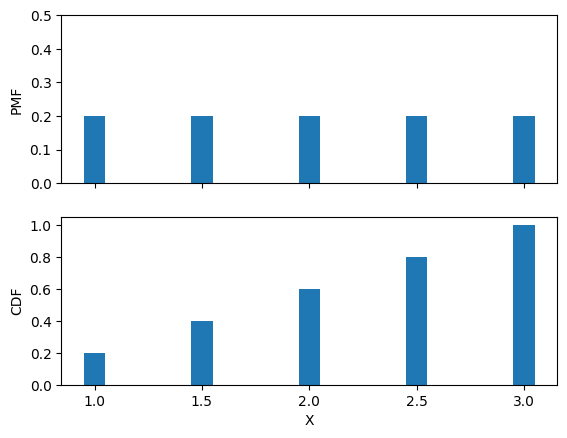

In [3]:
fig, ax = plt.subplots(nrows=2, sharex=True)
ax[0].bar(x, pmf, width=0.1)
ax[1].bar(x, cdf, width=0.1)
ax[0].set(ylim=(0, 0.5), ylabel="PMF")
ax[1].set(ylim=(0, 1.05), xlabel="X", ylabel="CDF")

A slightly more complex example where the plot range is a bit larger than the range of the distribution:

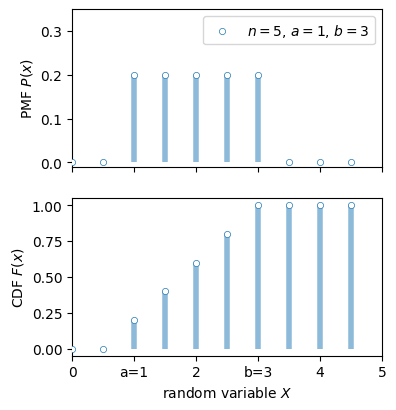

In [11]:
n = 5           # number of values
a, b = 1, 3     # lower and upper limit of interval
xlim = (0., 5)  # the plot range

# make sure that the interval limits a and b are exactly included
# and then everything between xlim[0]...a as well as b...xlim[1]
dx = (b-1)/(n-1)
x = np.arange(xlim[0], xlim[1], dx)

pmf = np.where(np.logical_and(a <= x, x <=b), 1 / n, 0)
cdf = np.cumsum(pmf)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(4, 4.5))
pmfplot(ax[0], x, pmf, label=r'$n={}$, $a={}$, $b={}$'.format(n, a, b))
pmfplot(ax[1], x, cdf, )
ax[0].legend()
ax[0].set(xlabel=r"", ylabel=r"PMF $P(x)$", xlim=xlim, ylim=(-0.01, 0.35))
ax[1].set(xlabel=r"random variable $X$", ylabel=r"CDF $F(x)$", 
          xlim=xlim, #ylim=[-0.02, 1.05],
          xticks=range(0, 6), xticklabels=['0', 'a=1',  2, 'b=3', '4', '5']);

### Drawing samples from a discrete uniform distribution of the values [1, 2, 3, 4]:

In [5]:
n = 15   # number of values
a, b = 1, 4   # lower and upper limit of interval

rng = np.random.default_rng()
rng.integers(a, b+1, n)

array([4, 4, 4, 3, 2, 3, 3, 2, 2, 4, 3, 2, 3, 4, 2])

## 10.3 Bernoulli Distribution

In [6]:
import matplotlib.pyplot as plt
import numpy as np


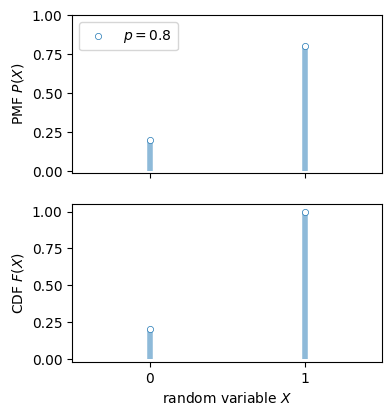

In [14]:
xlim = (-0.5, 1.5)
ylim = (-0.01, 1)

kws = [
    {'p': 0.5, 'color': 'C1', 'ls': '-', 'lw': 3.3, 's': 25},
    {'p': 0.8, 'color': '0', 'ls': '-', 'lw': 1.25, 's': 15},
]

p = 0.8 

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(4, 4.5))
x = np.arange(stats.bernoulli.ppf(0.0, p), stats.bernoulli.ppf(1., p)+1 )   
pmfplot(ax[0], x, stats.bernoulli.pmf(x, p), label=r'$p={}$'.format(p))
pmfplot(ax[1], x, stats.bernoulli.cdf(x, p))
    
ax[0].legend()
ax[0].set(xlabel=r"", ylabel=r"PMF $P(X)$", xlim=xlim, ylim=ylim)
ax[1].set(xlabel=r"random variable $X$", ylabel=r"CDF $F(X)$", xlim=xlim, ylim=[-0.02, 1.05])    
ax[1].set_xticks([0, 1]);

In [8]:
rng = np.random.default_rng()

n_samples = 1000
p = 0.8
sample = rng.binomial(n=1, p=p, size=n_samples)
# sample

Now show the distribution of these samples -- they roughly approximate the "true" distribution of the population shown above:

value 0 occurs 213 times
value 1 occurs 787 times


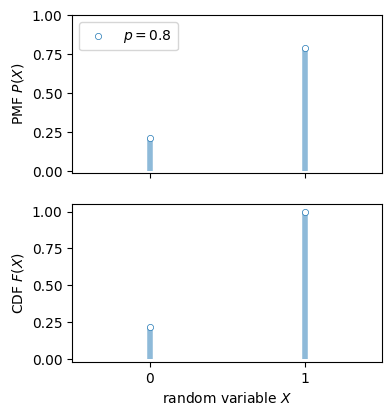

In [15]:
values = np.unique(sample)
counts = np.array([np.sum(sample == s) for s in values])

for v, c in zip(values, counts):
    print(f"value {v} occurs {c} times")

pmf = counts / counts.sum()
pdf = np.cumsum(pmf)


fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(4, 4.5))
pmfplot(ax[0], values, pmf, label=r'$p={}$'.format(p))
pmfplot(ax[1], values, pdf)    
ax[0].legend()
ax[0].set(xlabel=r"", ylabel=r"PMF $P(X)$", xlim=xlim, ylim=ylim)
ax[1].set(xlabel=r"random variable $X$", ylabel=r"CDF $F(X)$", xlim=xlim, ylim=[-0.02, 1.05])    
ax[1].set_xticks([0, 1]);